In [2]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

data=pd.read_excel('Desktop/S&P 500 data.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Close
0,2015-05-11,2105.33
1,2015-05-12,2099.12
2,2015-05-13,2098.48
3,2015-05-14,2121.10
4,2015-05-15,2122.73


# Generating Close Price Dynamics

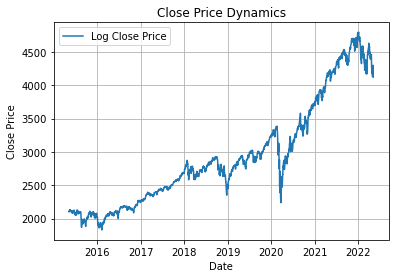

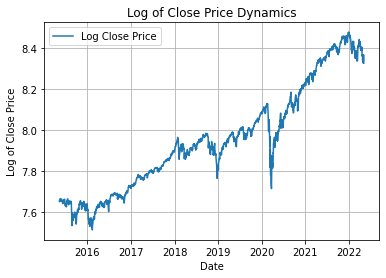

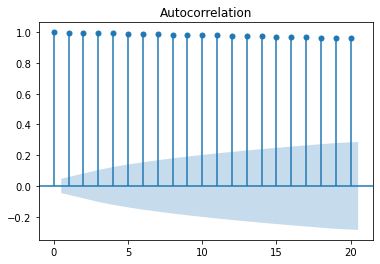

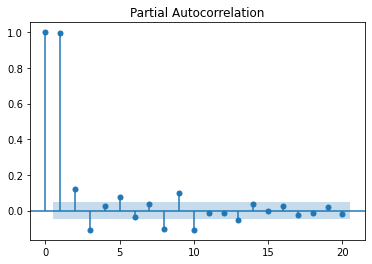

         acf      pacf             Q  p-val
0   0.997968  0.998534   1757.834420    0.0
1   0.996290  0.119892   3510.758484    0.0
2   0.994260 -0.108440   5257.538955    0.0
3   0.992376  0.023242   6998.695207    0.0
4   0.990643  0.073473   8734.764930    0.0
5   0.988794 -0.037019  10465.345859    0.0
6   0.987113  0.036306  12191.029278    0.0
7   0.985081 -0.100910  13910.594356    0.0
8   0.983429  0.101071  15625.373637    0.0
9   0.981351 -0.106483  17333.891445    0.0
10  0.979391 -0.011279  19036.560492    0.0
11  0.977334 -0.012556  20733.053259    0.0
12  0.975118 -0.053961  22422.827089    0.0
13  0.973095  0.035507  24106.562564    0.0
14  0.970942 -0.003078  25783.815173    0.0
15  0.969014  0.027649  27455.369570    0.0
16  0.966882 -0.025869  29120.529723    0.0
17  0.964837 -0.012470  30779.603700    0.0
18  0.962772  0.021952  32432.533562    0.0
19  0.960640 -0.019163  34079.092900    0.0


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [4]:
import pandas as pd

# Data consists of S&P 500 daily data 

# Taking the log of price level
data['lclose']=np.log(data['Close']) 
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the data

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(data['Date'], data['Close'], label='Log Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Dynamics')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(1)
plt.plot(data['Date'], data['lclose'], label='Log Close Price')
plt.xlabel('Date')
plt.ylabel('Log of Close Price')
plt.title('Log of Close Price Dynamics')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the correlograms- Testing whether the price level adjust back to equilibrium
# Plotting the ACF
# The number of lags is based on a rule of thumb: T/4 where T is the sample size.

import statsmodels.api as sm

sm.graphics.tsa.plot_acf(data["lclose"].values.squeeze(), lags=20) # The ACF
plt.show()

sm.graphics.tsa.plot_pacf(data["lclose"].values.squeeze(), lags=20) # The PACF
plt.show()

import statsmodels.tsa.api as smt

acf,q,pval=smt.acf(data['lclose'], nlags=20, qstat=True)
pacf = smt.pacf(data['lclose'],nlags=20)

correlogram = pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(correlogram)

# ARIMA Modelling on Non-stationary Data - Incomplete Output 

In [5]:
# Estimating AR(1)
ar1=smt.ARIMA(data['lclose'],order=(1,0,0)).fit()
print(ar1.summary())

# Estimating AR(2)
ar2=smt.ARIMA(data['lclose'],order=(2,0,0)).fit()
print(ar2.summary())

# Estimating AR(3)
ar3=smt.ARIMA(data['lclose'],order=(3,0,0)).fit()
print(ar3.summary())

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                 lclose   No. Observations:                 1762
Model:                     ARMA(1, 0)   Log Likelihood                5335.158
Method:                       css-mle   S.D. of innovations              0.012
Date:                Mon, 16 May 2022   AIC                         -10664.317
Time:                        02:00:14   BIC                         -10647.894
Sample:                             0   HQIC                        -10658.248
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.9734      0.224     35.557      0.000       7.534       8.413
ar.L1.lclose     0.9992      0.001   1274.966      0.000       0.998       1.001
                                    Roots   

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                 lclose   No. Observations:                 1762
Model:                     ARMA(2, 0)   Log Likelihood                5364.827
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 16 May 2022   AIC                         -10721.654
Time:                        02:00:14   BIC                         -10699.757
Sample:                             0   HQIC                        -10713.562
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.9771      0.250     31.946      0.000       7.488       8.467
ar.L1.lclose     0.8174      0.022     36.417      0.000       0.773       0.861
ar.L2.lclose     0.1820      0.022      8.10

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                 lclose   No. Observations:                 1762
Model:                     ARMA(3, 0)   Log Likelihood                5370.801
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 16 May 2022   AIC                         -10731.602
Time:                        02:00:15   BIC                         -10704.231
Sample:                             0   HQIC                        -10721.487
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.9745      0.238     33.570      0.000       7.509       8.440
ar.L1.lclose     0.8325      0.023     36.063      0.000       0.787       0.878
ar.L2.lclose     0.2493      0.030      8.30

# Data Transformation - First Differencing

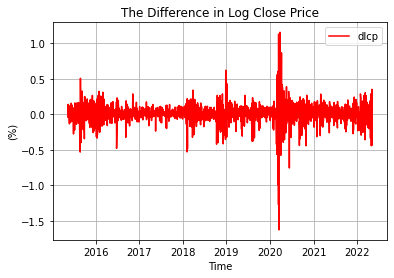

C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


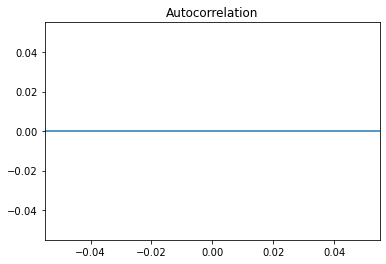

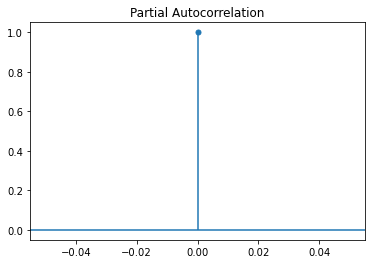

     acf  pacf   Q  p-val
0    NaN   NaN NaN    NaN
1    NaN   NaN NaN    NaN
2    NaN   NaN NaN    NaN
3    NaN   NaN NaN    NaN
4    NaN   NaN NaN    NaN
..   ...   ...  ..    ...
115  NaN   NaN NaN    NaN
116  NaN   NaN NaN    NaN
117  NaN   NaN NaN    NaN
118  NaN   NaN NaN    NaN
119  NaN   NaN NaN    NaN

[120 rows x 4 columns]


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [6]:
# Generating the first difference of the data

def LogDiff(x):
        x_diff=100*np.log(x/x.shift(1))
        return x_diff
    
data['dlcp']=LogDiff(data['lclose'])

# plotting the first difference
plt.figure(1)
plt.plot(data['Date'], data['dlcp'], label='dlcp', color='red')
plt.xlabel('Time')
plt.ylabel('(%)')
plt.title('The Difference in Log Close Price')
plt.grid(True)
plt.legend()
plt.show()


# Plotting the correlograms- Testing whether the price level adjust back to equilibrium

sm.graphics.tsa.plot_acf(data["dlcp"].values.squeeze(), lags=12) # The ACF
plt.show()

sm.graphics.tsa.plot_pacf(data["dlcp"].values.squeeze(), lags=12) # The PACF
plt.show()


# The Correlogram of log house prices

acf,q,pval=smt.acf(data['dlcp'], nlags=120, qstat=True)
pacf = smt.pacf(data['dlcp'],nlags=120)

correlogram=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(correlogram)

# Augmented Dickey Fuller Test - Ensuring Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data.lclose.dropna())
print('p-value prior to transformation', result[1])

result = adfuller(data.lclose.diff().dropna())
print('p-value post first differencing', result[1])

p-value prior to transformation 0.8539911270066461
p-value post first differencing 1.2201825726524459e-24


# Generating ARIMA Model Outputs - Post Differencing

ARIMA (1,1,0)

In [8]:
# Estimating the ARIMA(p,1,0) models

# Estimating AR(1)
dar1=smt.ARIMA(data['lclose'],order=(1,1,0)).fit()
print(dar1.summary())
res_dar1=dar1.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dar1, nlags=20, qstat=True)
pacf = smt.pacf(res_dar1,nlags=20)
corr1=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr1)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.lclose   No. Observations:                 1761
Model:                 ARIMA(1, 1, 0)   Log Likelihood                5366.244
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 16 May 2022   AIC                         -10726.489
Time:                        02:00:17   BIC                         -10710.068
Sample:                             1   HQIC                        -10720.420
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.000      1.653      0.098   -7.09e-05       0.001
ar.L1.D.lclose    -0.1837      0.023     -7.843      0.000      -0.230      -0.138
                                    

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


ARIMA (2,1,0)

In [9]:
# Estimating AR(2)
dar2=smt.ARIMA(data['lclose'],order=(2,1,0)).fit()
print(dar2.summary())
res_dar2=dar2.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dar2, nlags=20, qstat=True)
pacf = smt.pacf(res_dar2,nlags=20)
corr2=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr2) 

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.lclose   No. Observations:                 1761
Model:                 ARIMA(2, 1, 0)   Log Likelihood                5371.942
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 16 May 2022   AIC                         -10735.883
Time:                        02:00:18   BIC                         -10713.989
Sample:                             1   HQIC                        -10727.792
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.000      1.517      0.129      -0.000       0.001
ar.L1.D.lclose    -0.1688      0.024     -7.106      0.000      -0.215      -0.122
ar.L2.D.lclose     0.0805      0.024

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


ARIMA (3,1,0)

In [10]:
# Estimating AR(3)
dar3=smt.ARIMA(data['lclose'],order=(3,1,0)).fit()
print(dar3.summary())
res_dar3=dar3.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dar3, nlags=20, qstat=True)
pacf = smt.pacf(res_dar3,nlags=20)
corr3=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr3) 

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.lclose   No. Observations:                 1761
Model:                 ARIMA(3, 1, 0)   Log Likelihood                5372.378
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 16 May 2022   AIC                         -10734.755
Time:                        02:00:18   BIC                         -10707.387
Sample:                             1   HQIC                        -10724.642
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.000      1.483      0.138      -0.000       0.001
ar.L1.D.lclose    -0.1706      0.024     -7.161      0.000      -0.217      -0.124
ar.L2.D.lclose     0.0842      0.024

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


ARIMA (0,1,1)

In [11]:
# Estimating MA models

# Estimating the ARIMA(0,1,q) models

# Estimating MA(1)
dma1=smt.ARIMA(data['lclose'],order=(0,1,1)).fit()
print(dma1.summary())
res_dma1=dma1.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dma1, nlags=20, qstat=True)
pacf = smt.pacf(res_dma1,nlags=20)
corr4=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr4)                  

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.lclose   No. Observations:                 1761
Model:                 ARIMA(0, 1, 1)   Log Likelihood                5361.407
Method:                       css-mle   S.D. of innovations              0.012
Date:                Mon, 16 May 2022   AIC                         -10716.814
Time:                        02:00:18   BIC                         -10700.393
Sample:                             1   HQIC                        -10710.746
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.000      1.651      0.099   -7.17e-05       0.001
ma.L1.D.lclose    -0.1553      0.021     -7.230      0.000      -0.197      -0.113
                                    

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


ARIMA (0,1,2)

In [12]:
# Estimating MA(2)
dma2=smt.ARIMA(data['lclose'],order=(0,1,2)).fit()
print(dma2.summary())
res_dma2=dma2.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dma2, nlags=20, qstat=True)
pacf = smt.pacf(res_dma2,nlags=20)
corr5=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr5)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.lclose   No. Observations:                 1761
Model:                 ARIMA(0, 1, 2)   Log Likelihood                5372.530
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 16 May 2022   AIC                         -10737.059
Time:                        02:00:19   BIC                         -10715.165
Sample:                             1   HQIC                        -10728.968
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.000      1.462      0.144      -0.000       0.001
ma.L1.D.lclose    -0.1646      0.024     -7.002      0.000      -0.211      -0.119
ma.L2.D.lclose     0.1177      0.025

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


ARIMA (0,1,3)

In [13]:
# Estimating MA(3)
dma3=smt.ARIMA(data['lclose'],order=(0,1,3)).fit()
print(dma3.summary())
res_dma3=dma3.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dma3, nlags=20, qstat=True)
pacf = smt.pacf(res_dma3,nlags=20)
corr6=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr6)   

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.lclose   No. Observations:                 1761
Model:                 ARIMA(0, 1, 3)   Log Likelihood                5373.564
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 16 May 2022   AIC                         -10737.129
Time:                        02:00:19   BIC                         -10709.761
Sample:                             1   HQIC                        -10727.015
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.000      1.522      0.128      -0.000       0.001
ma.L1.D.lclose    -0.1711      0.024     -7.138      0.000      -0.218      -0.124
ma.L2.D.lclose     0.1228      0.025

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


ARIMA (1,1,1)

In [14]:
# Estimating ARIMA(1,1,1)
arima11=smt.ARIMA(data['lclose'],order=(1,1,1)).fit()
print(arima11.summary())
res_arima1=arima11.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_arima1, nlags=20, qstat=True)
pacf = smt.pacf(res_arima1,nlags=20)
corr7=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr7) 

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.lclose   No. Observations:                 1761
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5369.846
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 16 May 2022   AIC                         -10731.692
Time:                        02:00:20   BIC                         -10709.798
Sample:                             1   HQIC                        -10723.601
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.000      1.598      0.110   -8.64e-05       0.001
ar.L1.D.lclose    -0.4210      0.075     -5.587      0.000      -0.569      -0.273
ma.L1.D.lclose     0.2415      0.079

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release

ARIMA (2,1,2)

In [15]:
# Estimating ARIMA(2,1,2)
arima22=smt.ARIMA(data['lclose'],order=(2,1,2)).fit()
print(arima22.summary())
res_arima22=arima22.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_arima22, nlags=20, qstat=True)
pacf = smt.pacf(res_arima22,nlags=20)
corr8=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr8)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                             ARIMA Model Results                              
Dep. Variable:               D.lclose   No. Observations:                 1761
Model:                 ARIMA(2, 1, 2)   Log Likelihood                5426.729
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 16 May 2022   AIC                         -10841.458
Time:                        02:00:22   BIC                         -10808.616
Sample:                             1   HQIC                        -10829.321
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.000      1.561      0.119   -9.78e-05       0.001
ar.L1.D.lclose    -1.7376      0.024    -72.265      0.000      -1.785      -1.691
ar.L2.D.lclose    -0.8840      0.024

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


# Forecasting - ARIMA (2,1,0) Model

In [16]:
#Forecasting using  ARIMA (2,1,0)

# Idea is to split the data into Train and Test samples. 90% obsevation will be used to train the model 
# 10% of the observations will be considered as Test dataset for validating the prediction efficiency.

dar210=smt.ARIMA(data.lclose[:1586],order=(2,1,0)).fit()
print(dar210.summary())

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.lclose   No. Observations:                 1585
Model:                 ARIMA(2, 1, 0)   Log Likelihood                4847.856
Method:                       css-mle   S.D. of innovations              0.011
Date:                Mon, 16 May 2022   AIC                          -9687.711
Time:                        02:00:23   BIC                          -9666.238
Sample:                             1   HQIC                         -9679.734
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0005      0.000      1.823      0.068    -3.6e-05       0.001
ar.L1.D.lclose    -0.1839      0.025     -7.358      0.000      -0.233      -0.135
ar.L2.D.lclose     0.0974      0.025

In [17]:
toRow = int(len(data)*.9) # 90% train %10 test split

train = list(data[:toRow]['Close'])
test = list(data[toRow:]['Close'])

In [18]:
pred = []
testObs = len(test)

In [19]:
'''for i in range(testObs):
  model = smt.ARIMA(train, order=(2,1,0))
  modelFit = model.fit()
  output = modelFit.forecast()
  yhat = list(output[0])[0]'''

'for i in range(testObs):\n  model = smt.ARIMA(train, order=(2,1,0))\n  modelFit = model.fit()\n  output = modelFit.forecast()\n  yhat = list(output[0])[0]'

In [20]:
import statsmodels.tsa.statespace.sarimax as arima

model = arima.SARIMAX(endog=test, order=(2,1,0), trend='n')
modelFit = model.fit()
pred = modelFit.predict()

In [21]:
pred

array([   0.        , 4496.0491244 , 4469.12188851, 4511.36074071,
       4524.82107016, 4520.91713312, 4524.65100456, 4536.65675626,
       4534.23124534, 4520.36520937, 4515.60216401, 4494.10255741,
       4460.97950184, 4471.88945465, 4442.40794018, 4482.66381675,
       4470.27147925, 4434.15435017, 4362.52415236, 4361.35988364,
       4395.46031338, 4444.39279317, 4450.3488205 , 4442.64820744,
       4354.92512982, 4367.94216282, 4307.53822875, 4361.34112903,
       4296.47594968, 4350.51502291, 4359.04313193, 4397.62200623,
       4388.01608358, 4362.3617443 , 4353.63564192, 4364.6346269 ,
       4436.09000781, 4463.90856222, 4483.13757624, 4517.78920127,
       4532.84363572, 4548.04322724, 4543.67386204, 4566.67400337,
       4572.64349904, 4551.18023555, 4598.05241124, 4601.03254553,
       4612.71865854, 4629.65415466, 4658.59061827, 4676.98496371,
       4695.46760826, 4699.99407461, 4685.05950035, 4648.74627186,
       4652.88731946, 4682.19049801, 4679.62113503, 4700.67990

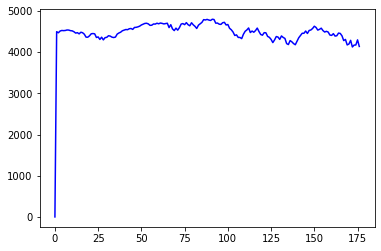

In [22]:
plt.plot(pred, 'blue', label='test')

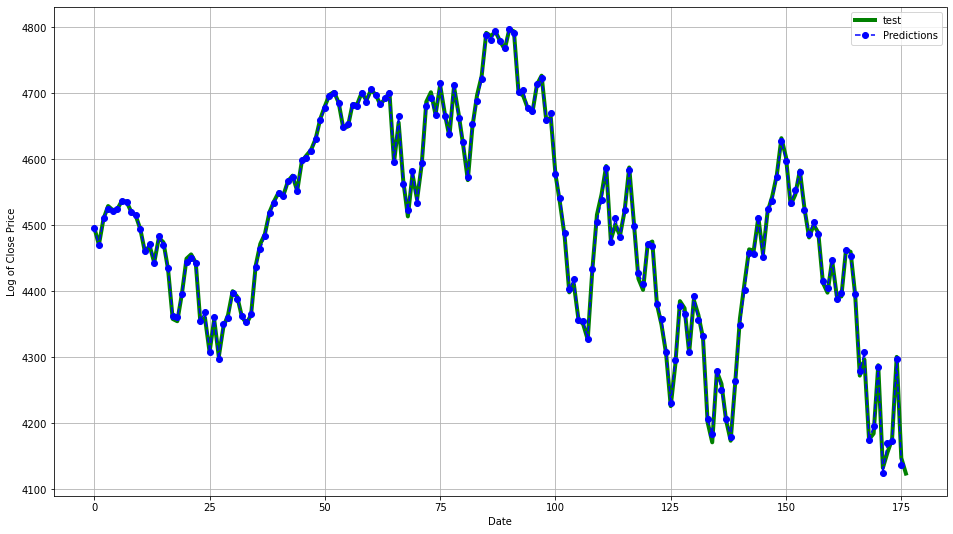

In [23]:
plt.figure(figsize=(16,9))
plt.xlabel('Date')
plt.ylabel('Log of Close Price')
plt.grid(True)
plt.plot(test, 'green', linewidth=4, label='test')
plt.plot(pred[1:], 'blue', marker='o', linestyle='dashed', label='Predictions')
plt.legend()